# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
!nvidia-smi

Tue Mar  8 07:08:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import tensorflow as tf

In [4]:
tf.__version__

'2.8.0'

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [5]:
#Import the dataset and read the image into a seperate variable

images='/content/drive/MyDrive/Capstone/Images/'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset are : {}".format(len(all_imgs)))

The total images present in the dataset are : 8091


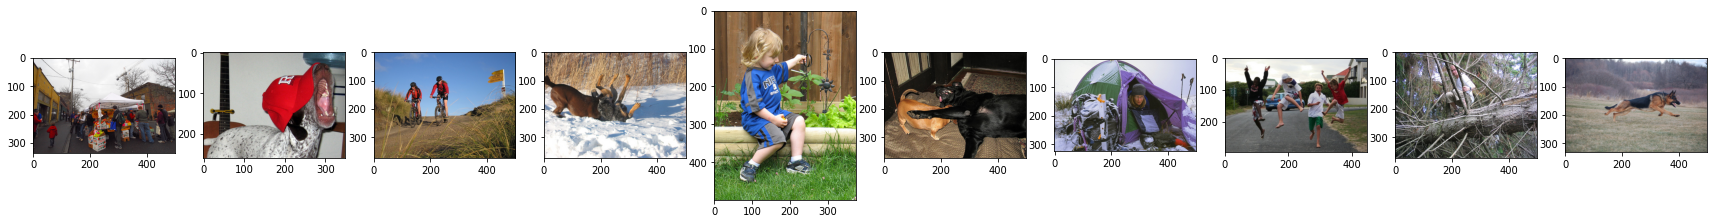

In [6]:
#Visualise both the images & text present in the dataset
import imageio

#visualise images in folder

Display_Images = all_imgs[0:10]
figure, axes = plt.subplots(1,10)
figure.set_figwidth(30)


for ax, image in zip(axes, Display_Images):
    ax.imshow(imageio.imread(image))

In [7]:
type(Display_Images)

list

In [8]:
#Import the dataset and read the text file into a seperate variable

text_file = '/content/drive/MyDrive/Capstone/captions.txt'

def load_doc(filename):
    
    open_file = open(filename, 'r', encoding='latin-1')   #reads the file
    text = open_file.read()
    open_file.close()
    
    return text

doc = load_doc(text_file)
print(doc[:480])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fight


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [9]:
all_img_id= [] #store all the image id here
all_img_vector= [] #store all the image path here
annotations= [] #store all the captions here

with open ('/content/drive/MyDrive/Capstone/captions.txt') as f:
    next(f)
    
    for line in f:
        split_arr = line.split(',')
        all_img_id.append(split_arr[0])
        annotations.append(split_arr[1].rstrip('\n'))
        all_img_vector.append(images+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Capstone/Images/1000268...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Capstone/Images/1000268...,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Capstone/Images/1000268...,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Capstone/Images/1000268...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Capstone/Images/1000268...,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472.jpg,/content/drive/MyDrive/Capstone/Images/9977227...,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,/content/drive/MyDrive/Capstone/Images/9977227...,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,/content/drive/MyDrive/Capstone/Images/9977227...,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,/content/drive/MyDrive/Capstone/Images/9977227...,A rock climber in a red shirt .


In [10]:
len(annotations)

40455

In [11]:
print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_imgs)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [12]:
annotations[:5]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [13]:
#Create the vocabulary & the counter for the captions
#lower() ensure every word is counted irrespective of its alphabet case.

vocabulary= [word.lower() for line in annotations for word in line.split()] #write your code here

val_count=Counter(vocabulary)
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         '.': 34205,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 

In [14]:
type(val_count)

collections.Counter

In [15]:
#total count of our vocabulary

print(len(val_count))

8871


Text(0.5, 0, 'Count')

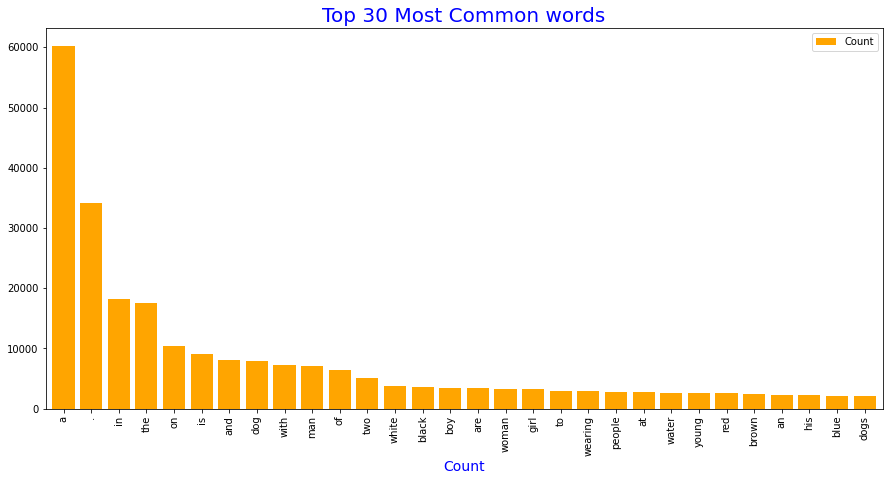

In [16]:
#Visualise the top 30 occuring words in the captions


#write your code here

# for word, count in val_count.most_common(30):
#     print(word, ": ", count)

top_30 = val_count.most_common(30)
top_30_df = pd.DataFrame(top_30, columns = ['Word', 'Count'])
top_30_df.plot.bar(x="Word", y = "Count", width = 0.8, figsize = (15,7), color = 'orange')

plt.title('Top 30 Most Common words', fontsize = 20, color = 'blue')
plt.xlabel('Words', fontsize = 14, color = 'blue')
plt.xlabel('Count', fontsize = 14, color = 'blue')

In [17]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud, STOPWORDS

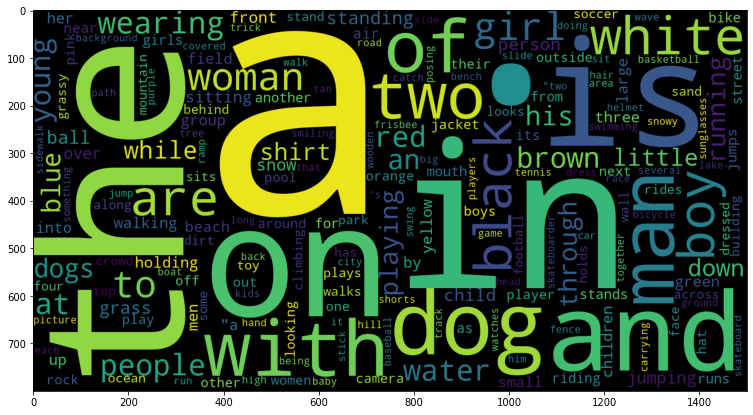

In [19]:
wordcloud = WordCloud(width = 1500, height = 800).generate_from_frequencies(val_count)
plt.figure(figsize = (15,7))
plt.imshow(wordcloud)

In [20]:
from keras.preprocessing.image import load_img

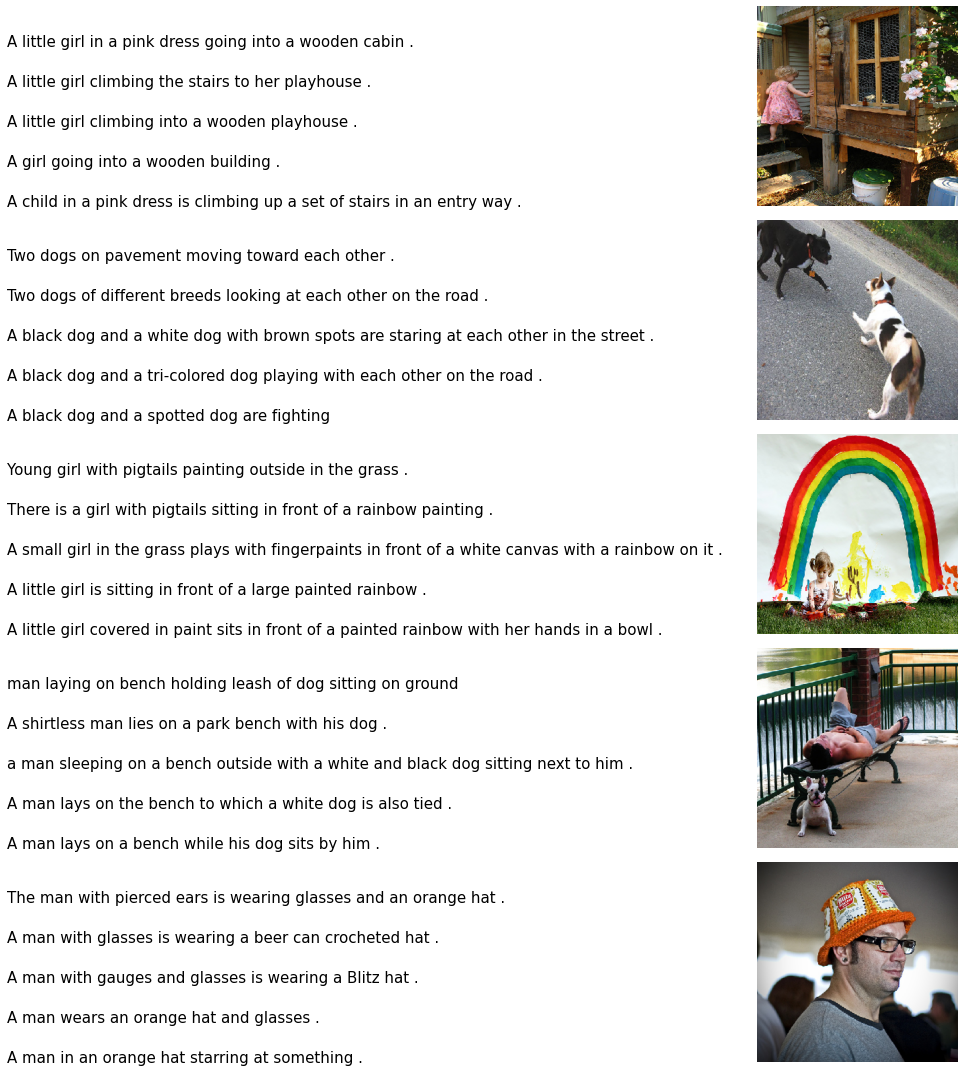

In [21]:
# Let us visualize image and captions together

fig = plt.figure(figsize=(15,15)) # For displaying image
count = 1
    
for Path in df[:25].Path.unique(): # Loading 1st 25 paths which will have 5 distinct images
    captions = list(df["Captions"].loc[df.Path== Path].values)
    display_image = load_img(Path,target_size=(299,299,3))
    ax = fig.add_subplot(5,2,count) #Adding a subplot that spans 5 rows:
    plt.axis('off')  # we don't want both x and y axes for caption 
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions)) #to decide the spacing between each line of caption
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=15)  #to display the captions         
    count+=1
    plt.tight_layout() #to make sure that image and caption don't overlap

    ax = fig.add_subplot(5,2,count)
    ax.imshow(display_image)
    plt.axis('off')
    count +=1

plt.show()

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [22]:
#Keeping top 5000 words
final_vocab_count = val_count.most_common(5000)
final_vocab_count

[('a', 60196),
 ('.', 34205),
 ('in', 18174),
 ('the', 17507),
 ('on', 10357),
 ('is', 9069),
 ('and', 8057),
 ('dog', 7948),
 ('with', 7304),
 ('man', 7137),
 ('of', 6495),
 ('two', 5132),
 ('white', 3706),
 ('black', 3620),
 ('boy', 3514),
 ('are', 3365),
 ('woman', 3304),
 ('girl', 3277),
 ('to', 3005),
 ('wearing', 2916),
 ('people', 2811),
 ('at', 2810),
 ('water', 2676),
 ('young', 2587),
 ('red', 2553),
 ('brown', 2457),
 ('an', 2325),
 ('his', 2255),
 ('blue', 2125),
 ('dogs', 2095),
 ('running', 1996),
 ('through', 1978),
 ('playing', 1954),
 ('while', 1807),
 ('down', 1755),
 ('little', 1736),
 ('shirt', 1735),
 ('standing', 1702),
 ('ball', 1678),
 ('grass', 1565),
 ('person', 1515),
 ('child', 1507),
 ('snow', 1439),
 ('jumping', 1430),
 ('over', 1378),
 ('front', 1322),
 ('sitting', 1322),
 ('small', 1257),
 ('three', 1251),
 ('"a', 1234),
 ('field', 1221),
 ('up', 1215),
 ('holding', 1211),
 ('large', 1207),
 ('group', 1200),
 ('by', 1167),
 ('green', 1156),
 ('yellow', 1

In [23]:
top_5000_vocab = [i[0] for i in final_vocab_count]
top_5000_vocab

['a',
 '.',
 'in',
 'the',
 'on',
 'is',
 'and',
 'dog',
 'with',
 'man',
 'of',
 'two',
 'white',
 'black',
 'boy',
 'are',
 'woman',
 'girl',
 'to',
 'wearing',
 'people',
 'at',
 'water',
 'young',
 'red',
 'brown',
 'an',
 'his',
 'blue',
 'dogs',
 'running',
 'through',
 'playing',
 'while',
 'down',
 'little',
 'shirt',
 'standing',
 'ball',
 'grass',
 'person',
 'child',
 'snow',
 'jumping',
 'over',
 'front',
 'sitting',
 'small',
 'three',
 '"a',
 'field',
 'up',
 'holding',
 'large',
 'group',
 'by',
 'green',
 'yellow',
 'children',
 'walking',
 'her',
 'men',
 'into',
 'beach',
 'air',
 'near',
 'jumps',
 'mouth',
 'street',
 'runs',
 'for',
 'another',
 'riding',
 'from',
 'its',
 'stands',
 'as',
 'bike',
 'girls',
 'outside',
 'one',
 'rock',
 'player',
 'off',
 'next',
 'play',
 'out',
 'pink',
 'orange',
 'looking',
 'pool',
 'other',
 'their',
 'camera',
 'boys',
 'jacket',
 'women',
 'hat',
 'around',
 'some',
 'dirt',
 'soccer',
 'sits',
 'behind',
 'toy',
 'dressed

In [24]:
annotations[:5]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [25]:
import string
#data cleaning

punct = str.maketrans('','', string.punctuation)

for r in range (len(annotations)):
    line = annotations[r]
    line = line.split()
    
    line = [word.lower() for word in line]
    
    line = [word.translate(punct) for word in line]
    line = [word for word in line if len(word) > 1]
    
    line = [word for word in line if word.isalpha()]
    
    annotations[r] = ' '.join(line)

In [26]:
annotations[0:5]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [27]:
#add the <start> & <end> token to all those captions as well

annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

Text(0.5, 0, 'Count')

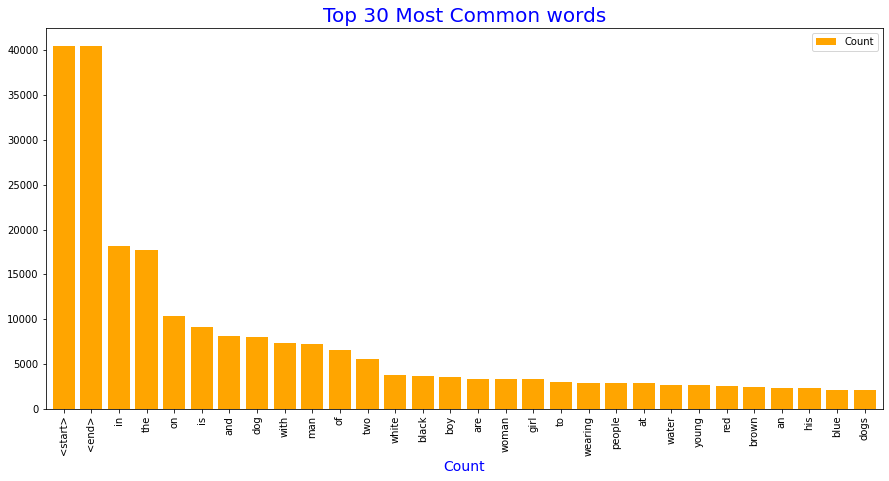

In [28]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
final_vocab = [word.lower() for line in annotations for word in line.split()]
val_count=Counter(final_vocab)
top_30 = val_count.most_common(30)

top_30_df = pd.DataFrame(top_30, columns = ['Word', 'Count'])
top_30_df.plot.bar(x="Word", y = "Count", width = 0.8, figsize = (15,7), color = 'orange')

plt.title('Top 30 Most Common words', fontsize = 20, color = 'blue')
plt.xlabel('Words', fontsize = 14, color = 'blue')
plt.xlabel('Count', fontsize = 14, color = 'blue')

In [29]:
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [30]:
from keras.preprocessing.text import Tokenizer

In [31]:
top_voc = 5000
tokenizer =Tokenizer(num_words=top_voc+1,filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',
                                                  lower=True, char_level=False,
                                                  oov_token="UNK")


# Create word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations) #Updates internal vocabulary based on a list of texts.

train_seqs = tokenizer.texts_to_sequences(annotations)#Transforms each text in texts to a sequence of integers.

# when we use the pad_sequence to process the sequence, we will be using 0 as the padding value.
# In order to distinguish between PAD and UNKNOWN, keras use different index for UNKNOWN.

# 0 is a reserved index that won't be assigned to any word.Let's add PAD token for zero

tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [32]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


In [33]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

train_seqs_len=[len(seq) for seq in train_seqs] #storing all lengths in list.Can be used if needed in future
longest_word_length= max(train_seqs_len) #Python list method max returns the elements from the list with maximum value.

# Calculates the longest_word_length to pad all sequences to be the same length as the longest one.

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post',maxlen=longest_word_length,
                                                          dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


In [34]:
cap_vector

array([[  2,  43,   4, ...,   0,   0,   0],
       [  2,  19, 309, ...,   0,   0,   0],
       [  2,  37,  19, ...,   0,   0,   0],
       ...,
       [  2,  42,   4, ...,   0,   0,   0],
       [  2,  82, 350, ...,   0,   0,   0],
       [  2,  82, 350, ...,   0,   0,   0]], dtype=int32)

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [35]:
IMAGE_SHAPE = (299,299)  #As for inception V3, input image size is (299,299)

In [36]:
#For now, lets preprocess 5 images to see how they look like.
preprocessed_imgs=[]
for img in all_imgs[:5]:
    img = tf.io.read_file(img,name=None)
    img = tf.image.decode_jpeg(img,channels=0) 
    img = tf.image.resize(img, IMAGE_SHAPE)
    img = tf.keras.applications.inception_v3.preprocess_input(img,data_format=None)#Default value for data format is None
    # It refers to global setting tf.keras.backend.image_data_format()
    preprocessed_imgs.append(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape after resizing the images : (299, 299, 3)
Shape after resizing the images : (299, 299, 3)
Shape after resizing the images : (299, 299, 3)
Shape after resizing the images : (299, 299, 3)
Shape after resizing the images : (299, 299, 3)


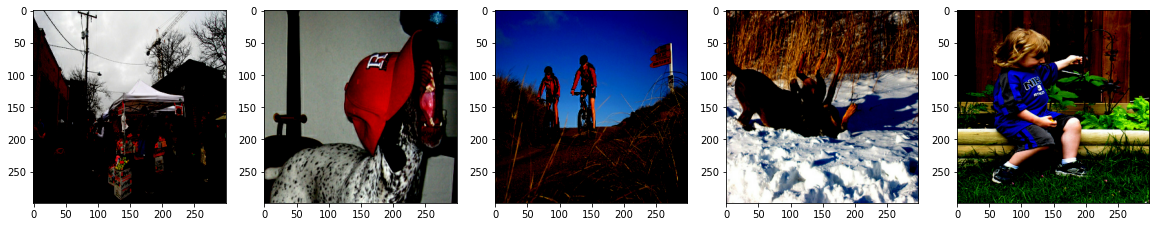

In [37]:
Display_Images= preprocessed_imgs[:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
   
for ax,image in zip(axes, Display_Images):
    print("Shape after resizing the images :", image.shape)
    ax.imshow(image)

In [38]:
# Now let's write a function for preprocessing all the images

def preprocess_images(image_path):

    img = tf.io.read_file(image_path,name=None)
    img = tf.image.decode_jpeg(img,channels=0) 
    img = tf.image.resize(img, IMAGE_SHAPE)
    img = tf.keras.applications.inception_v3.preprocess_input(img,data_format=None)
    return img, image_path

## Dataset Creation

In [39]:
# mapping each image full path including name to the function to preprocess the image

# sorting and storing unique path in list which will be given as input 
training_list = sorted(set(all_img_vector)) 

# Creating a Dataset using tf.data.Dataset.from_tensor_slice
New_Image_Data = tf.data.Dataset.from_tensor_slices(training_list)


In [40]:
type(New_Image_Data)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [41]:
# Mapping preprocess_images function across the elements of the above dataset
New_Image_Data = New_Image_Data.map(preprocess_images, num_parallel_calls=tf.data.experimental.AUTOTUNE)


# Keeping batch_size=16 as per computation power
New_Image_Data= New_Image_Data.batch(64,drop_remainder=False)

In [42]:
type(New_Image_Data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [43]:
New_Image_Data

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Performing test-train split

img_train_data, img_test_data, caption_train_data, caption_test_data = train_test_split(all_img_vector,
                                                                                        cap_vector,
                                                                                        test_size=0.2,
                                                                                        random_state=42)

In [46]:
print("Number of images in training dataset: ",len(img_train_data))
print("Number of images in testing dataset: ",len(img_test_data))
print("Number of captions in training dataset: ",len(caption_train_data))
print("Number of captions in testing dataset: ",len(caption_test_data))

Number of images in training dataset:  32364
Number of images in testing dataset:  8091
Number of captions in training dataset:  32364
Number of captions in testing dataset:  8091


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [47]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input#write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output #write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input,hidden_layer)#build the final model using both input & output layer

In [48]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [49]:
!pip install tqdm

We just need to extract feature vectors of images from this model. So we would not be needing the last softmax layer and hence we are going to remove it.

In [50]:
from tqdm import tqdm
import numpy

In [51]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)

image_features_dict={}
for image, image_path in tqdm(New_Image_Data): #using tqdm as progress bar
    features_for_batch = image_features_extract_model(image) #feeding images from above created dataset to Inception v3 which we build above
    #fb_shape = features_for_batch.get_shape().as_list()
    #features_for_batch_flattened = tf.contrib.layers.flatten(fb_shape) 
    features_for_batch_flattened = tf.reshape(features_for_batch,
                             (features_for_batch.shape[0], -1, features_for_batch.shape[3]))
                                   
    for batch_feat, path in zip(features_for_batch_flattened, image_path):
        feature_path = path.numpy().decode("utf-8")
        image_features_dict[feature_path] =  batch_feat.numpy()


100%|██████████| 127/127 [01:23<00:00,  1.53it/s]


## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [52]:
#we need to give both images and caption to model as input
def model_input(image,captions):
    image_final = image_features_dict[image.decode('utf-8')]
    return image_final,captions

In [53]:
# Buffer size to shuffle the dataset
BUFFER_SIZE = 1000

# Batch size
BATCH_SIZE = 64

def data_generator(images_data, captions_data):
    
    # Creating a Dataset using tf.data.Dataset.from_tensor_slice 
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))

    # num_parallel_calls= tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(model_input, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # reshuffle_each_iteration=True indicate Shuffle order should be different for each epoch.
    # Keeping batch_size=64 (64 consecutive elements of this dataset is combined in a single batch).
    # We don't want to drop the last batch if it contains element less than 64.So let's set drop_remainder=False 
    # Prefetch function is used to prepare later elements while the current element is being processed.
    
    dataset = (
     dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=True) 
    .batch(BATCH_SIZE, drop_remainder=False)
    .prefetch(tf.data.experimental.AUTOTUNE)
    ) 

    return dataset

In [54]:
train_dataset=data_generator(img_train_data,caption_train_data) 
test_dataset=data_generator(img_test_data,caption_test_data) 

In [55]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,30)

(64, 64, 2048)
(64, 31)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [56]:
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1
train_num_steps = len(img_train_data) // BATCH_SIZE  #len(total train images) // BATCH_SIZE
test_num_steps = len(img_test_data) // BATCH_SIZE   #len(total test images) // BATCH_SIZE
max_length=30
features_shape = batch_feat.shape[1]
attention_features_shape = batch_feat.shape[0]

In [57]:
from tensorflow.keras.models import Model

### Encoder

In [58]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense =tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0) #applying relu activation 
        
        return features

    

In [59]:
encoder=Encoder(embedding_dim)

### Attention model

In [60]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 =  tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  hidden[:, tf.newaxis] # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score =tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) # build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.keras.activations.softmax(self.V(score), axis=1)  # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1) # reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

The attention model does a linear transformation of the input.So we are applying tanh function on top of it.The features produced from dense layer(FC layer) of encoder and hidden state of decoder are passed to tanh function and attention score is calculated

In other words, the tanh function is introduced to do non linear transformation and give smooth output .Since we need output in range (0,1), we apply softmax function on the obtained attention score which now gives the atttention weights.

Finally we computed a weighted sum of the attention weights on the feature vector and thus, derived our context vector.

This context vector produced are adaptive as they change for each and every time stamp

### Decoder

In [61]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed =  self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)  # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

We know that the encoder output along with hidden state is passed to attention model.The attention model produces context vector.This context vector is concatenated with embedded vector formed from embedding layer and passed to GRU.After passing the GRU output to dense layers,finally we are trying to obtain output in shape of vocab_size as we need to assign probabilities for each and every word in vocabulary.

In [62]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [63]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                            reduction=tf.keras.losses.Reduction.NONE) #define your loss object

In [65]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [66]:
checkpoint_path = "/content/drive/MyDrive/Capstone/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [67]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [68]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
       encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder
       for t in range(1, target.shape[1]):
          # passing encoder_output to the decoder
          predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

          loss += loss_function(target[:, t], predictions)

          dec_input = tf.expand_dims(target[:, t], 1)
    
    avg_loss = (loss / int(target.shape[1])) #we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables
    
    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables)) 

    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [69]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: #Record operations for automatic differentiation.
        #write your code here to do the training steps
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder.
        for t in range(1, target.shape[1]):
          # passing encoder_output to the decoder
          predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

          loss += loss_function(target[:, t], predictions) 

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, t], 1)
    
    avg_loss = (loss / int(target.shape[1]))#we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables

    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables))
        
    #write your code here to do the testing steps
        
    return loss, avg_loss

We are using teacher forcing as training converges faster. Also, in the initial steps of training, the predictions of the model are very bad. If we are not using it, the hidden states of the model might be updated with the sequence of wrong predictions because of the relational understading present between words, and this mislead the model as errors will keep on adding, and the model will learn wrongly and perform badly at the end.So in order to train the model in right direction, we are doing this tweaking and forcing the model to predict correctly by passing the target word as the next input to the decoder

In [70]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
        avg_test_loss=total_loss / test_num_steps
    
    return avg_test_loss

In [71]:
import time

In [72]:
loss_plot = []
test_loss_plot = []
EPOCHS = 50

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/50 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.443, & test loss is 1.202
Time taken for 1 epoch 193.12818789482117 sec

Test loss has been reduced from 100.000 to 1.202


  2%|▏         | 1/50 [03:14<2:38:27, 194.04s/it]

For epoch: 2, the train loss is 1.110, & test loss is 1.058
Time taken for 1 epoch 68.28896284103394 sec

Test loss has been reduced from 1.202 to 1.058


  4%|▍         | 2/50 [04:22<1:36:14, 120.29s/it]

For epoch: 3, the train loss is 1.007, & test loss is 0.971
Time taken for 1 epoch 68.99086380004883 sec

Test loss has been reduced from 1.058 to 0.971


  6%|▌         | 3/50 [05:32<1:16:04, 97.12s/it] 

For epoch: 4, the train loss is 0.933, & test loss is 0.906
Time taken for 1 epoch 69.46585750579834 sec

Test loss has been reduced from 0.971 to 0.906


  8%|▊         | 4/50 [06:42<1:06:12, 86.36s/it]

For epoch: 5, the train loss is 0.873, & test loss is 0.850
Time taken for 1 epoch 69.71345710754395 sec

Test loss has been reduced from 0.906 to 0.850


 10%|█         | 5/50 [07:52<1:00:25, 80.56s/it]

For epoch: 6, the train loss is 0.821, & test loss is 0.799
Time taken for 1 epoch 69.85238027572632 sec

Test loss has been reduced from 0.850 to 0.799


 12%|█▏        | 6/50 [09:02<56:30, 77.05s/it]  

For epoch: 7, the train loss is 0.772, & test loss is 0.751
Time taken for 1 epoch 70.10471200942993 sec

Test loss has been reduced from 0.799 to 0.751


 14%|█▍        | 7/50 [10:13<53:43, 74.95s/it]

For epoch: 8, the train loss is 0.729, & test loss is 0.710
Time taken for 1 epoch 70.00766611099243 sec

Test loss has been reduced from 0.751 to 0.710


 16%|█▌        | 8/50 [11:23<51:27, 73.51s/it]

For epoch: 9, the train loss is 0.687, & test loss is 0.668
Time taken for 1 epoch 70.03656935691833 sec

Test loss has been reduced from 0.710 to 0.668


 18%|█▊        | 9/50 [12:34<49:36, 72.59s/it]

For epoch: 10, the train loss is 0.649, & test loss is 0.631
Time taken for 1 epoch 70.12886071205139 sec

Test loss has been reduced from 0.668 to 0.631


 20%|██        | 10/50 [13:44<47:57, 71.94s/it]

For epoch: 11, the train loss is 0.614, & test loss is 0.596
Time taken for 1 epoch 70.09540915489197 sec

Test loss has been reduced from 0.631 to 0.596


 22%|██▏       | 11/50 [14:55<46:29, 71.53s/it]

For epoch: 12, the train loss is 0.581, & test loss is 0.566
Time taken for 1 epoch 70.0532898902893 sec

Test loss has been reduced from 0.596 to 0.566


 24%|██▍       | 12/50 [16:05<45:05, 71.19s/it]

For epoch: 13, the train loss is 0.551, & test loss is 0.540
Time taken for 1 epoch 76.42929244041443 sec

Test loss has been reduced from 0.566 to 0.540


 26%|██▌       | 13/50 [17:22<44:58, 72.94s/it]

For epoch: 14, the train loss is 0.522, & test loss is 0.508
Time taken for 1 epoch 69.91533780097961 sec

Test loss has been reduced from 0.540 to 0.508


 28%|██▊       | 14/50 [18:33<43:17, 72.14s/it]

For epoch: 15, the train loss is 0.498, & test loss is 0.488
Time taken for 1 epoch 69.97357225418091 sec

Test loss has been reduced from 0.508 to 0.488


 30%|███       | 15/50 [19:43<41:47, 71.64s/it]

For epoch: 16, the train loss is 0.475, & test loss is 0.465
Time taken for 1 epoch 69.90770769119263 sec

Test loss has been reduced from 0.488 to 0.465


 32%|███▏      | 16/50 [20:53<40:21, 71.23s/it]

For epoch: 17, the train loss is 0.452, & test loss is 0.444
Time taken for 1 epoch 69.95998907089233 sec

Test loss has been reduced from 0.465 to 0.444


 34%|███▍      | 17/50 [22:04<39:01, 70.97s/it]

For epoch: 18, the train loss is 0.434, & test loss is 0.425
Time taken for 1 epoch 69.94828796386719 sec

Test loss has been reduced from 0.444 to 0.425


 36%|███▌      | 18/50 [23:14<37:44, 70.77s/it]

For epoch: 19, the train loss is 0.414, & test loss is 0.407
Time taken for 1 epoch 70.02596592903137 sec

Test loss has been reduced from 0.425 to 0.407


 38%|███▊      | 19/50 [24:24<36:30, 70.66s/it]

For epoch: 20, the train loss is 0.398, & test loss is 0.387
Time taken for 1 epoch 69.86248207092285 sec

Test loss has been reduced from 0.407 to 0.387


 40%|████      | 20/50 [25:35<35:17, 70.57s/it]

For epoch: 21, the train loss is 0.384, & test loss is 0.375
Time taken for 1 epoch 69.96095442771912 sec

Test loss has been reduced from 0.387 to 0.375


 42%|████▏     | 21/50 [26:45<34:04, 70.50s/it]

For epoch: 22, the train loss is 0.368, & test loss is 0.357
Time taken for 1 epoch 70.02202486991882 sec

Test loss has been reduced from 0.375 to 0.357


 44%|████▍     | 22/50 [27:56<32:54, 70.51s/it]

For epoch: 23, the train loss is 0.356, & test loss is 0.345
Time taken for 1 epoch 70.00200486183167 sec

Test loss has been reduced from 0.357 to 0.345


 46%|████▌     | 23/50 [29:06<31:42, 70.46s/it]

For epoch: 24, the train loss is 0.342, & test loss is 0.335
Time taken for 1 epoch 69.94396090507507 sec

Test loss has been reduced from 0.345 to 0.335


 48%|████▊     | 24/50 [30:16<30:32, 70.47s/it]

For epoch: 25, the train loss is 0.330, & test loss is 0.321
Time taken for 1 epoch 69.94313502311707 sec

Test loss has been reduced from 0.335 to 0.321


 50%|█████     | 25/50 [31:27<29:20, 70.41s/it]

For epoch: 26, the train loss is 0.321, & test loss is 0.314
Time taken for 1 epoch 69.83364152908325 sec

Test loss has been reduced from 0.321 to 0.314


 52%|█████▏    | 26/50 [32:37<28:09, 70.39s/it]

For epoch: 27, the train loss is 0.311, & test loss is 0.304
Time taken for 1 epoch 69.85124850273132 sec

Test loss has been reduced from 0.314 to 0.304


 54%|█████▍    | 27/50 [33:47<26:57, 70.33s/it]

For epoch: 28, the train loss is 0.304, & test loss is 0.293
Time taken for 1 epoch 69.96518015861511 sec

Test loss has been reduced from 0.304 to 0.293


 56%|█████▌    | 28/50 [34:58<25:48, 70.36s/it]

For epoch: 29, the train loss is 0.291, & test loss is 0.283
Time taken for 1 epoch 70.01234126091003 sec

Test loss has been reduced from 0.293 to 0.283


 58%|█████▊    | 29/50 [36:08<24:37, 70.37s/it]

For epoch: 30, the train loss is 0.284, & test loss is 0.275
Time taken for 1 epoch 70.0146415233612 sec

Test loss has been reduced from 0.283 to 0.275


 60%|██████    | 30/50 [37:19<23:28, 70.41s/it]

For epoch: 31, the train loss is 0.278, & test loss is 0.270
Time taken for 1 epoch 69.99606728553772 sec

Test loss has been reduced from 0.275 to 0.270


 62%|██████▏   | 31/50 [38:29<22:17, 70.40s/it]

For epoch: 32, the train loss is 0.271, & test loss is 0.261
Time taken for 1 epoch 69.99942350387573 sec

Test loss has been reduced from 0.270 to 0.261


 64%|██████▍   | 32/50 [39:39<21:07, 70.42s/it]

For epoch: 33, the train loss is 0.265, & test loss is 0.258
Time taken for 1 epoch 69.88547158241272 sec

Test loss has been reduced from 0.261 to 0.258


 66%|██████▌   | 33/50 [40:50<19:56, 70.37s/it]

For epoch: 34, the train loss is 0.257, & test loss is 0.249
Time taken for 1 epoch 69.87880444526672 sec

Test loss has been reduced from 0.258 to 0.249


 68%|██████▊   | 34/50 [42:00<18:45, 70.32s/it]

For epoch: 35, the train loss is 0.252, & test loss is 0.243
Time taken for 1 epoch 69.94299578666687 sec

Test loss has been reduced from 0.249 to 0.243


 70%|███████   | 35/50 [43:10<17:35, 70.34s/it]

For epoch: 36, the train loss is 0.247, & test loss is 0.242
Time taken for 1 epoch 69.90010023117065 sec

Test loss has been reduced from 0.243 to 0.242


 72%|███████▏  | 36/50 [44:20<16:24, 70.31s/it]

For epoch: 37, the train loss is 0.244, & test loss is 0.232
Time taken for 1 epoch 69.91060972213745 sec

Test loss has been reduced from 0.242 to 0.232


 76%|███████▌  | 38/50 [46:41<14:02, 70.23s/it]

For epoch: 38, the train loss is 0.237, & test loss is 0.233
Time taken for 1 epoch 69.95246052742004 sec

For epoch: 39, the train loss is 0.232, & test loss is 0.228
Time taken for 1 epoch 74.70636510848999 sec

Test loss has been reduced from 0.232 to 0.228


 78%|███████▊  | 39/50 [47:56<13:09, 71.80s/it]

For epoch: 40, the train loss is 0.227, & test loss is 0.223
Time taken for 1 epoch 71.28105974197388 sec

Test loss has been reduced from 0.228 to 0.223


 80%|████████  | 40/50 [49:08<11:57, 71.78s/it]

For epoch: 41, the train loss is 0.228, & test loss is 0.217
Time taken for 1 epoch 70.01317644119263 sec

Test loss has been reduced from 0.223 to 0.217


 82%|████████▏ | 41/50 [50:19<10:42, 71.39s/it]

For epoch: 42, the train loss is 0.222, & test loss is 0.215
Time taken for 1 epoch 69.96454930305481 sec

Test loss has been reduced from 0.217 to 0.215


 84%|████████▍ | 42/50 [51:29<09:28, 71.12s/it]

For epoch: 43, the train loss is 0.221, & test loss is 0.212
Time taken for 1 epoch 70.05545663833618 sec

Test loss has been reduced from 0.215 to 0.212


 86%|████████▌ | 43/50 [52:40<08:16, 70.94s/it]

For epoch: 44, the train loss is 0.214, & test loss is 0.209
Time taken for 1 epoch 69.94845390319824 sec

Test loss has been reduced from 0.212 to 0.209


 88%|████████▊ | 44/50 [53:50<07:04, 70.77s/it]

For epoch: 45, the train loss is 0.210, & test loss is 0.204
Time taken for 1 epoch 69.96568465232849 sec

Test loss has been reduced from 0.209 to 0.204


 90%|█████████ | 45/50 [55:00<05:53, 70.67s/it]

For epoch: 46, the train loss is 0.208, & test loss is 0.198
Time taken for 1 epoch 70.13244366645813 sec

Test loss has been reduced from 0.204 to 0.198


 92%|█████████▏| 46/50 [56:11<04:42, 70.67s/it]

For epoch: 47, the train loss is 0.206, & test loss is 0.196
Time taken for 1 epoch 69.89896154403687 sec

Test loss has been reduced from 0.198 to 0.196


 96%|█████████▌| 48/50 [58:32<02:20, 70.49s/it]

For epoch: 48, the train loss is 0.205, & test loss is 0.199
Time taken for 1 epoch 70.2470166683197 sec



 98%|█████████▊| 49/50 [59:42<01:10, 70.36s/it]

For epoch: 49, the train loss is 0.201, & test loss is 0.196
Time taken for 1 epoch 70.05312442779541 sec

For epoch: 50, the train loss is 0.198, & test loss is 0.194
Time taken for 1 epoch 70.08136415481567 sec

Test loss has been reduced from 0.196 to 0.194


100%|██████████| 50/50 [1:00:52<00:00, 73.06s/it]


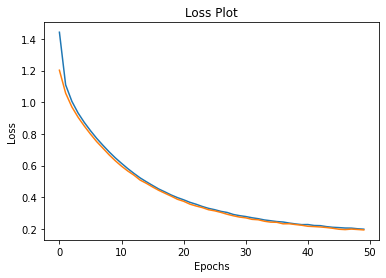

In [73]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [74]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_images(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id]) #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [75]:
def beam_evaluate(image, beam_index = 3): #your value for beam index

    max_len=max_length
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_len, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_images(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption


In [76]:
from PIL import Image

In [77]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [78]:
from nltk.translate.bleu_score import sentence_bleu

In [79]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [80]:
img_test=img_test_data.copy()

In [81]:
cap_test=caption_test_data.copy()

In [82]:
!pip install gTTS

In [83]:
!pip install playsound

In [84]:
from gtts import gTTS
from playsound import playsound
from IPython import display

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [85]:
#modifying the given code as function to run it several times by changing weights
def predicted_caption_audio(random,autoplay=False,weights=(0.5, 0.5, 0, 0)):

    cap_test=caption_test_data.copy()
    rid = np.random.randint(0, random)
    test_image = img_test[rid]
    #test_image = 'Flickr8K/Images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = evaluate(test_image)

    real_caption=filt_text(real_caption)      

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights)
    print(f"BELU score: {score*100}")

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)

    #Let's use Google Text to Speech Online API from playing the predicted caption as audio
    speech = gTTS("Predicted Caption is: "+ pred_caption,lang = 'en', slow = False) 
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    #playsound('voice.wav')
    display.display(display.Audio(audio_file, rate=None,autoplay=autoplay))
    
    return test_image

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 53.45224838248488
Real Caption: person skiing downhill
Prediction Caption: person is skiing down snow covered hill


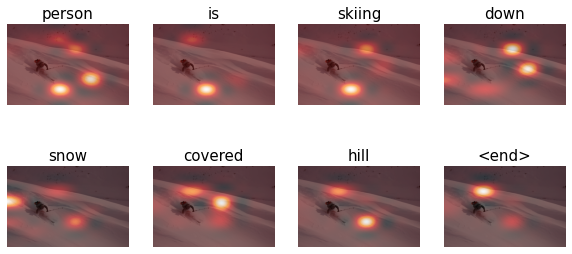

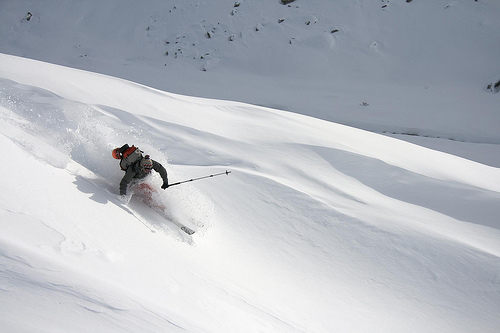

In [86]:
test_image=predicted_caption_audio(5,True,weights=(0.5,0.25,0,0))

Image.open(test_image)

BELU score: 100.0
Real Caption: woman at kite festival on boardwalk
Prediction Caption: woman at kite festival on boardwalk


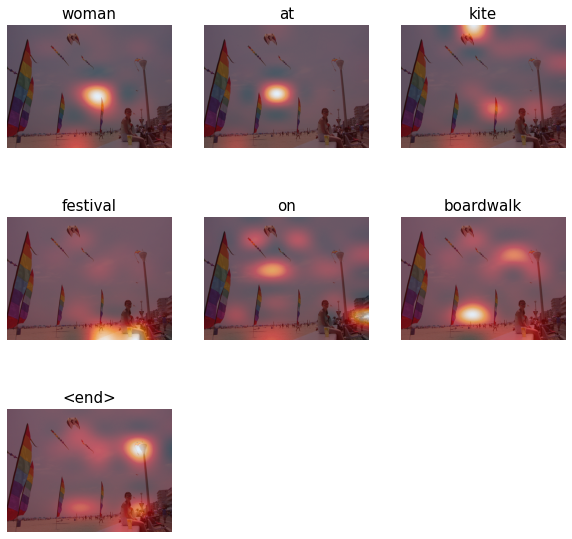

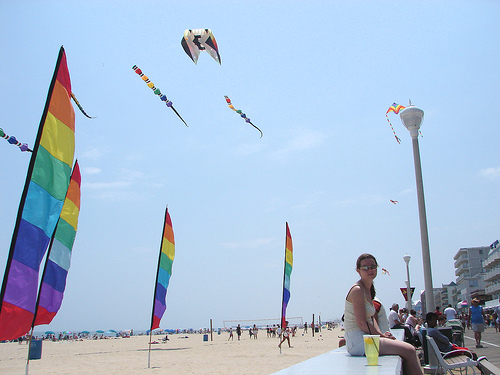

In [87]:
test_image1=predicted_caption_audio(len(img_test),False,weights=(0.25,0.25,0,0))

Image.open(test_image1)

In [88]:
image_features_extract_model.save('InceptionV3_Features_Extractor.h5')

In [89]:
encoder.save_weights('Encoder_model_weights')

In [90]:
decoder.save_weights('Decoder_model_weights')

In [91]:
loaded_encoder = Encoder(embedding_dim)

In [92]:
loaded_encoder.load_weights('Encoder_model_weights')

In [93]:
loaded_decoder = Decoder(embedding_dim, units, vocab_size)
loaded_decoder.load_weights('Decoder_model_weights')

In [94]:
loaded_V3 = tf.keras.models.load_model('InceptionV3_Features_Extractor.h5')

In [95]:
def loaded_evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = loaded_decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_images(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = loaded_V3(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = loaded_encoder(img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = loaded_decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id]) #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [96]:
def predicted_caption_audio_loadedmodels(random,autoplay=False,weights=(0.5, 0.5, 0, 0)):

    cap_test=caption_test_data.copy()
    rid = np.random.randint(0, random)
    test_image = img_test[rid]
    #test_image = 'Flickr8K/Images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = loaded_evaluate(test_image)

    real_caption=filt_text(real_caption)      

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights)
    print(f"BELU score: {score*100}")

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)

    #Let's use Google Text to Speech Online API from playing the predicted caption as audio
    speech = gTTS("Predicted Caption is: "+ pred_caption,lang = 'en', slow = False) 
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    #playsound('voice.wav')
    display.display(display.Audio(audio_file, rate=None,autoplay=autoplay))
    
    return test_image

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 48.54917717073234
Real Caption: tennis player hits the ball
Prediction Caption: female tennis player dressed in green hits yellow ball


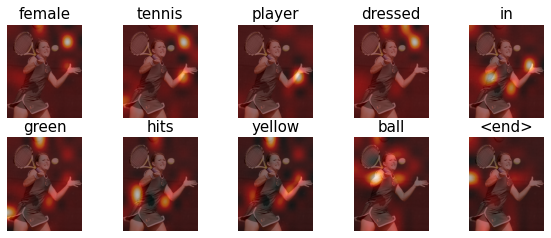

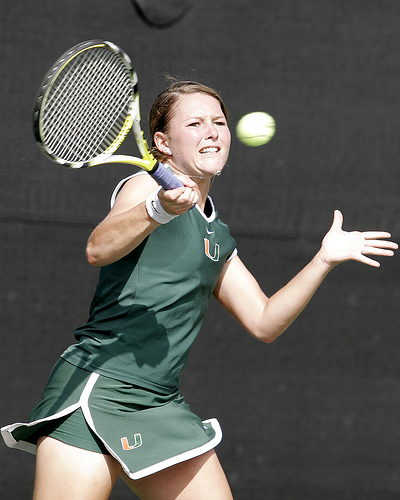

In [98]:
test_image_loaded=predicted_caption_audio_loadedmodels(len(img_test),False,weights=(0.25,0.25,0,0))

Image.open(test_image_loaded)